In [1]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

Loaddata

In [3]:
from utils import Dataloader
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [4]:
def array_to_matrix(arr, n_cols):
    n_rows = len(arr) // n_cols
    return np.array(arr).reshape(n_rows, n_cols)

In [5]:
mnist = Dataloader(None, None, 'mnist', None, None)
print(f"Exporting mnist to python... ")
data = mnist.export_to_python()

[7 7 3 7 3 3 7 7 7 3]
Dataset:  mnist
X_train:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train:  [[ 1. -1.]
 [ 1. -1.]]
X_test:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test:  [[-1.  1.]
 [-1.  1.]]
(12396, 784) (12396, 2) (2038, 784) (2038, 2)
Exporting mnist to python... 


In [6]:
C = 1.0
clf_mnist = SVC(kernel = 'linear', C = C)
X_shape = mnist.X_train_shape
X_train = data[0]
y_train = data[1]
y = array_to_matrix(y_train,2)
X = array_to_matrix(X_train,X_shape[1])
y = np.array([np.argmax(np.append(i,0)) for i in y])
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
clf_mnist.fit(X_reduced, y) 

SVC(kernel='linear')

In [7]:
X_test = array_to_matrix(data[2],X_shape[1])
y_test = array_to_matrix(data[3],2)
y_test = np.array([np.argmax(np.append(i,0)) for i in y_test])
X_test_reduced = pca.transform(X_test)
y_pred = clf_mnist.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9612365063788028


In [30]:
print(X_test_reduced.shape)
print(X_test_reduced.shape[0])

(2038, 2)
2038


In [19]:
print(X_test_reduced[:600, 0])

[ -8.60695361  -6.34596339  10.19535289  -6.23238797   2.74748252
   8.09723916  -5.14638841  -7.1539786   -6.56340417   2.32421579
   9.79795661  -3.39261619   3.30967402  -5.50986248   8.35498052
  -8.11789584  -6.12103167   6.58304509 -10.40334618  -4.27524337
  -6.59539429  -8.34588557   5.95064383   7.76937646   5.01133679
  -1.07524488  -1.94486252   2.29978207  -4.4628657   -3.31997513
  -6.31740344  -3.98428807  -7.1750091    2.95213195  -6.57389155
   6.55478773  -4.46651867   6.35266787  -1.99166735   0.20600755
  15.71435285   4.79946172   0.36363791   6.48699117  -7.13457866
 -10.03045807  -6.04829406   3.55057597   3.99678886  -2.64688604
  -2.06230755   3.6217135   -6.1911398   -2.12778615  -8.26246978
  -7.35245552   8.15460204  -2.67949418  -1.28322     -4.07719034
   6.08681928   7.13580619   8.73006489   4.7084592   -6.49745863
   7.00937968   5.82592578  -5.85437906  11.43143879  -2.54470929
  -2.89650212   4.78351957  -4.0807638   -1.96947175   8.76291483
  -4.87967

679


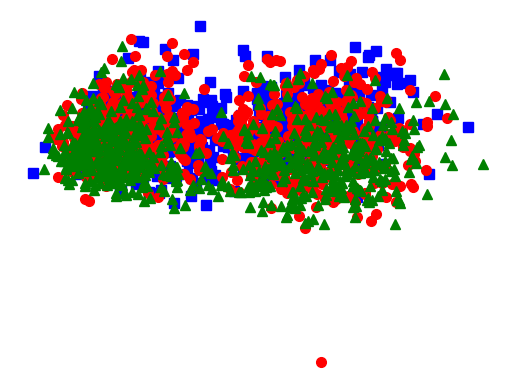

In [29]:
N=X_test_reduced.shape[0]
print(N)
# plt.plot(X_test_reduced[:N, 0], X_test_reduced[:N, 1], 'bs', markersize = 7);       # lớp đầu tiên
# plt.plot(X_test_reduced[N:2*N, 0], X_test_reduced[N:2*N, 1], 'ro', markersize = 7); # lớp thứ hai
# plt.plot(X_test_reduced[2*N:, 0], X_test_reduced[2*N:, 1], 'g^', markersize = 7);   # lớp thứ ba
# plt.scatter(X_test_reduced[:N, 0], X_test_reduced[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)
plt.scatter(X_test_reduced[0, :N], X_test_reduced[1, :N], c=np.argmax(Y, axis=0), edgecolors='k', cmap=plt.cm.Paired)
# plt.axis('off')
# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# Hiển thị kết quả
# xm = np.arange(-1.5, 1.5, 0.025)
# ym = np.arange(-1.5, 1.5, 0.025)
# xx, yy = np.meshgrid(xm, ym)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
X0 = np.vstack((xx1, yy1))
Z = clf_mnist.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plt.xlim([-1.5, 1.5])
# plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()